<p>Jordan Hoover  
CSC570R  
Assignment: Reddit Survey


In [1658]:
%matplotlib inline

In [1659]:
# imports
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [1660]:
df=pd.read_csv("RedditShortDemoSurvey-Cleaned.csv")

First step is Data cleaning  
<li>Aggregate all Countries to their Continents.
<li>Drop US States
<li>Look for and handle missing values
<li>Create indicator variables for categoricals, bin where you feel appropriate
<li>Clean bad data (e.g. the value movies is present in “Are you a dog or a cat person?”
<li>Visualize the distributions of cleaned variables

There are many unique countries, so the best approach I thought of,  
is to find a list of countries and continents and combine it with my dataframe

In [1661]:
# open csv file containing countries with their associated continent
# I had to turn off na detection because it was reading NA as NaN
cc=pd.read_csv("country_continent_list.csv", keep_default_na=False)

AF = Africa  
AS = Asia  
EU = Europe  
NA = North America  
SA = South America  
OC = Oceania  
AN = Anarctica

The first way that I got this to work, was to create a dictionary  
out of my country & continent dataframe and then map it to the original df
After a lot of work, I ended up with the right continent names(but as lists), 
and then I figured out that another seemingly cleaner way to do it was to just
merge the dataframes together using merge syntax, and then drop the 2 columns   that have country data:

In [1662]:
# merge the 2 dataframes on country name
df=pd.merge(df, cc, left_on='Treated country data',right_on='countryName')

In [1663]:

# now drop the country names.  There are now 2 columns for country name and each column has a different name
df=df.drop(df.columns[8], axis=1)  #can drop by index or column name


In [1664]:
del df['countryName']  # delete the 2nd country name column 
# aggregation of all countries to their continenets is now completed

In [1665]:
# the next question says to drop US states.  
# well, the whole column is for US states, so if we are droppping all US states then we can drop the whole US states column
# since the rest of the values for out of the US states are irrelevant/NaN
df = df.drop(df.columns[8], axis=1)  #can drop by index or column name


# next is to handle missing values

In [1666]:
# there are whole columns that appear to have nothing in them.  I will drop those first.
df=df.drop(df.columns[12:18], axis=1)

In [1667]:
# now I will drop the rest of the missing values.  I will drop rows with missing data,
# for simplicity and because there is a lot of data so a few less rows should not matter that much 
df=df.dropna(axis=0)

# the result was dropping 3948 rows from the dataframe.  This might seems like a lot, but the data is already messy, and I think 
# for such an unstructed datset, cleaner data would be better than more data

missing values are handled
now i have to 
# create indicator variables for categorical variables,  
and bin if it seems appropriate

However, I want to clean some bad data at the same time. Some of the attribures have many diffent values,
so many that I found that if I create too many indicator variables, I end up with almost 2,000 columns.

In [1668]:
# get rid of bad data in dogs and cats column
df=df[df['Are you a dog or a cat person?']!='none']

In [1669]:
df=df[df['Are you a dog or a cat person?']!='I like turtles.']

In [1670]:
df=df[df['Are you a dog or a cat person?']!='movies']

In [1671]:
df=df[df['Are you a dog or a cat person?']!='askreddit']

In [1672]:
df=df[df['Are you a dog or a cat person?']!='Reddit.com']

In [1673]:
#df.dtypes

In [1674]:
# drop  ' Pics' from cheese column
df=df[df['If you were a cheese, what cheese would you be?']!=' Pics']

In [1675]:
df=df[df['Do you currently have children under the age of 18 living in your household?']!='None']

In [1676]:
# drop the whole subreddit data column.  It seems way too messy and has too many unique values to be useful
del df['treated subreddit data']

In [1677]:
# drop id as well
df= df.drop('Entry Id',1)

In [1679]:
# I need to drop the 'Blank' rows from my dependenet variable because I don't want to try to predict whether or not
# someone left the field blank, that is bad data
df=df[df['What is your marital status?']!='Blank']

In [1680]:
# I think I should drop the Widowed as well because there are very few of those values 
# in marital status
df['What is your marital status?'].value_counts()

Single                                      7621
In a relationship                           7213
Forever Alone                               4075
Married/civil union/domestic partnership    3864
Engaged                                      828
Widowed                                       23
Name: What is your marital status?, dtype: int64

In [1681]:
df=df[df['What is your marital status?']!='Widowed']

In [1682]:
#marital status.  This is my dependent variable.
df['What is your marital status?'].unique()

# I have 5 different levels for my class


array(['Married/civil union/domestic partnership', 'Forever Alone',
       'In a relationship', 'Single', 'Engaged'], dtype=object)

In [1683]:
# I will convert the values to numbers: 
df['What is your marital status?']=preprocessing.LabelEncoder().fit_transform(df['What is your marital status?'])

In [1684]:
#now I have the same 6 different levels for my marital class but they are numeric:
df['What is your marital status?'].unique()

array([3, 1, 2, 4, 0], dtype=int64)

# for my dependent variable marital status, I have made it all numeric
0= Engaged  
1= Forever Alone  
2= In a relationship   
3= Married/civil union/domestic partnership  
4= Single  

In [1685]:
# no need to drop one and do n-1 for this, but I need to create dummy/indicator variables for all categorical variables
# For each variable, create indicator variables and drop the old variable

#gender
df=df.join(pd.get_dummies(df['Please indicate your gender.'], prefix='gender'))
df=df.drop(['Please indicate your gender.'],axis=1)

In [1686]:
#age
df=df.join(pd.get_dummies(df['Please select the category that includes your age.'], prefix='age'))
df=df.drop(['Please select the category that includes your age.'], axis=1)

In [1687]:

#employment status
df=df.join(pd.get_dummies(df['What best describes your employment status?'], prefix='employment'))
df=df.drop(['What best describes your employment status?'], axis=1)


In [1688]:

#military service
df=df.join(pd.get_dummies(df['Are you or have you ever been in military service?'], prefix='military'))
df=df.drop(['Are you or have you ever been in military service?'], axis=1)


In [1689]:

#children under 18
df=df.join(pd.get_dummies(df['Do you currently have children under the age of 18 living in your household?'], prefix='has_c_under_18'))
df=df.drop(['Do you currently have children under the age of 18 living in your household?'], axis=1)


In [1690]:

#education
df=df.join(pd.get_dummies(df['What best describes your level of education?'], prefix='eductation'))
df=df.drop(['What best describes your level of education?'], axis=1)


In [1691]:

#yearly income before taxes
df=df.join(pd.get_dummies(df['Which one of the following ranges includes your total yearly household income before taxes?'], prefix='income'))
df=df.drop(['Which one of the following ranges includes your total yearly household income before taxes?'], axis=1)


In [1692]:

#dog or cat person
df=df.join(pd.get_dummies(df['Are you a dog or a cat person?'], prefix='dog_or_cat'))
df=df.drop(['Are you a dog or a cat person?'], axis=1)


In [1693]:

#kind of cheese a person would be 
df=df.join(pd.get_dummies(df['If you were a cheese, what cheese would you be?'], prefix='cheese'))
df=df.drop(['If you were a cheese, what cheese would you be?'], axis=1)


In [1694]:

#continent
df=df.join(pd.get_dummies(df['continent'], prefix='continent'))
df=df.drop(['continent'], axis=1)

now data has been cleaned, try to visualize the data distributions

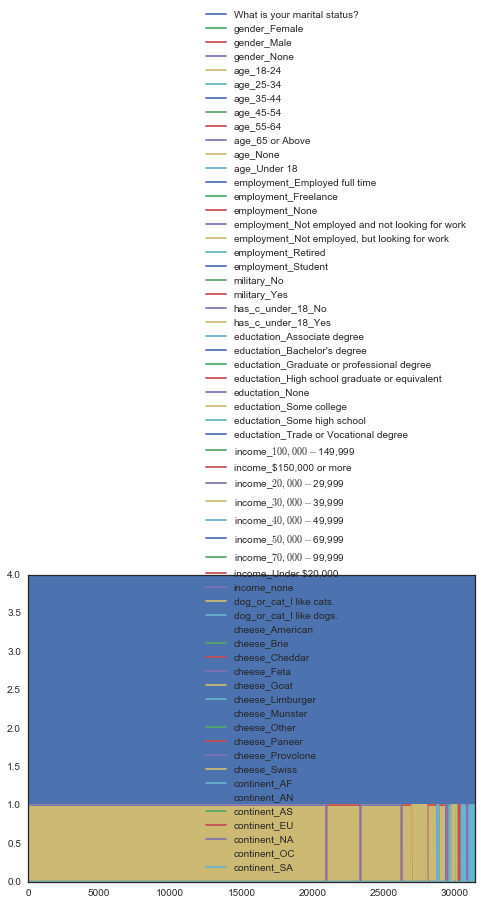

In [1695]:
df.plot()

# determine which variables are most highly collinear
and graph the result

In [1696]:
df.corr()
# computes pairwise correlation of columns, excluding NA/null values

,What is your marital status?,gender_Female,gender_Male,gender_None,age_18-24,age_25-34,age_35-44,age_45-54,age_55-64,age_65 or Above,...,cheese_Paneer,cheese_Provolone,cheese_Swiss,continent_AF,continent_AN,continent_AS,continent_EU,continent_NA,continent_OC,continent_SA
What is your marital status?,1.000000,-0.020412,0.020863,-0.003664,0.015487,-0.049104,0.039380,0.015875,0.020062,0.002365,...,-0.003884,0.005791,-0.001226,-0.000357,-0.000511,-0.004188,-0.056198,0.054329,-0.001038,-0.021706
gender_Female,-0.020412,1.000000,-0.984217,-0.034255,0.042951,-0.027910,-0.023372,0.012610,0.009876,0.018140,...,0.023002,-0.026266,-0.041668,-0.010891,-0.004468,-0.017877,-0.098370,0.109233,-0.026318,-0.023351
gender_Male,0.020863,-0.984217,1.000000,-0.143146,-0.038876,0.025124,0.023795,-0.012834,-0.009084,-0.020459,...,-0.022789,0.027754,0.040444,0.011532,0.004539,0.018914,0.096502,-0.106939,0.024015,0.023102
gender_None,-0.003664,-0.034255,-0.143146,1.000000,-0.020658,0.014199,-0.003674,0.001956,-0.003932,0.014097,...,0.000056,-0.009848,0.004626,-0.004218,-0.000650,-0.006835,0.005156,-0.006962,0.011558,0.000122
age_18-24,0.015487,0.042951,-0.038876,-0.020658,1.000000,-0.726795,-0.259848,-0.117767,-0.055342,-0.036032,...,-0.015869,-0.001716,0.020522,-0.009574,-0.009146,-0.026932,-0.008032,0.021627,-0.004225,-0.006837
age_25-34,-0.049104,-0.027910,0.025124,0.014199,-0.726795,1.000000,-0.191321,-0.086709,-0.040747,-0.026529,...,0.025606,0.013749,-0.028355,0.014511,0.012585,0.027836,0.010952,-0.026327,0.002616,0.015578
age_35-44,0.039380,-0.023372,0.023795,-0.003674,-0.259848,-0.191321,1.000000,-0.031001,-0.014568,-0.009485,...,0.001777,-0.017486,-0.008709,-0.001098,-0.002408,0.008191,0.009627,-0.012361,0.006998,-0.008875
age_45-54,0.015875,0.012610,-0.012834,0.001956,-0.117767,-0.086709,-0.031001,1.000000,-0.006602,-0.004299,...,-0.001559,-0.005475,0.011239,-0.000997,-0.001091,-0.010984,-0.023132,0.027131,-0.003961,-0.006929
age_55-64,0.020062,0.009876,-0.009084,-0.003932,-0.055342,-0.040747,-0.014568,-0.006602,1.000000,-0.002020,...,-0.007323,-0.002920,-0.000762,-0.003329,-0.000513,-0.003484,-0.016460,0.018930,-0.004401,-0.005123
age_65 or Above,0.002365,0.018140,-0.020459,0.014097,-0.036032,-0.026529,-0.009485,-0.004299,-0.002020,1.000000,...,-0.004768,-0.005503,0.003510,0.017477,-0.000334,-0.005576,-0.001665,0.002636,-0.002001,-0.003336


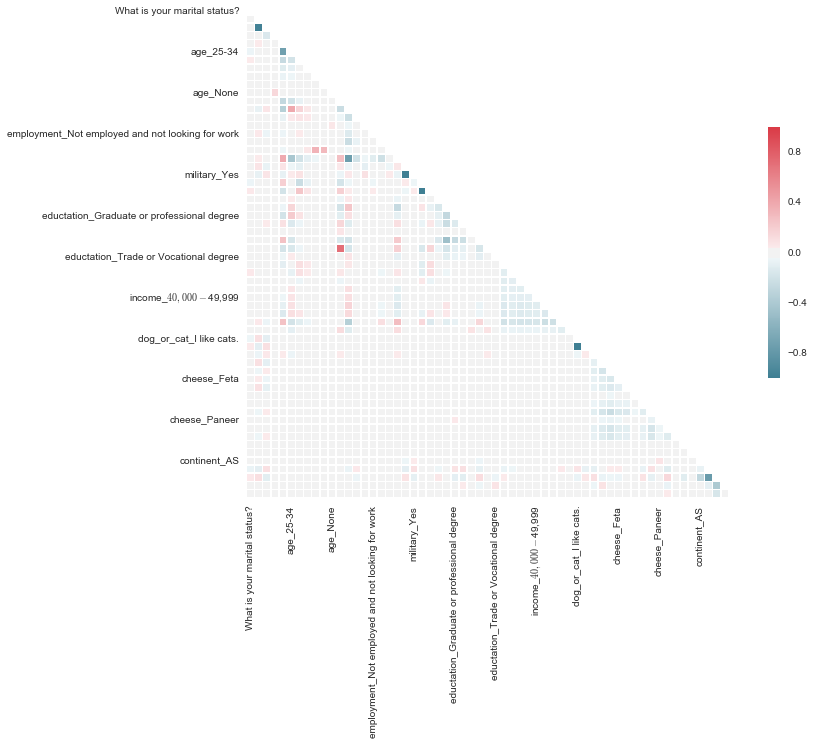

In [1697]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [1698]:
# create a random forest model to predict my dependent variable, Martial Status

In [1699]:
# split the data up, import random forest
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm


In [1700]:
# split data for training and testing
y=df['What is your marital status?']

In [1701]:
#drop dependent variable from the test data
df=df.drop(['What is your marital status?'], axis=1)

In [1702]:
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=.2, random_state=42)

In [1703]:
# create a base rate model: 
def base_rate_model(X):
    y =np.zeros(X.shape[0])
    return y

In [1704]:
y_base_rate=base_rate_model(X_test)
print("Base rate accuracy is %.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.04


In [1705]:

model=RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [1706]:
# confusion matrix to evaluate multi class variable martial status
#confusion_matrix = cm(y_test, model.predict(X_test))
df_confusion_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'], margins=True)

In [1707]:
df_confusion_matrix

Predicted,0,1,2,3,4,All
Actual,,,,,,
0,6,14,71,43,35,169
1,5,125,226,50,374,780
2,21,160,567,160,579,1487
3,13,27,143,481,81,745
4,16,208,522,121,673,1540
All,61,534,1529,855,1742,4721


In [1708]:
model.feature_importances_

array([ 0.01565929,  0.01552899,  0.00225282,  0.03419096,  0.01875177,
        0.01591989,  0.00471138,  0.00154683,  0.00054652,  0.000767  ,
        0.01061478,  0.02780341,  0.01326097,  0.00133995,  0.00690988,
        0.01379781,  0.00086665,  0.02608533,  0.01454651,  0.01436384,
        0.02812278,  0.02963573,  0.0145783 ,  0.02996846,  0.02111784,
        0.01909919,  0.00121383,  0.02910104,  0.01048223,  0.00860781,
        0.02079591,  0.01702772,  0.02142888,  0.0208085 ,  0.02065437,
        0.02324417,  0.02063941,  0.02625046,  0.01152049,  0.03151255,
        0.03093778,  0.01679495,  0.02923303,  0.03697122,  0.02692126,
        0.02394918,  0.0058491 ,  0.0184069 ,  0.0365986 ,  0.00954733,
        0.02574451,  0.0281351 ,  0.0019884 ,  0.00011702,  0.00855383,
        0.0176824 ,  0.02152461,  0.01162271,  0.00414782])

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


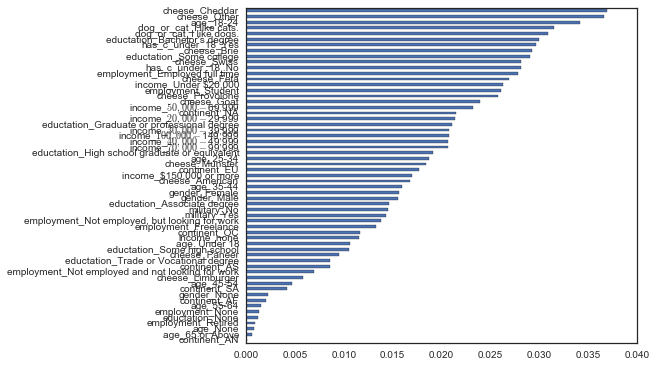

In [1709]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=df.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));